# Linear Regression

In [ ]:
# Deprecated
'''
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/housing_prices.csv")

x_list = df['square_feet'].to_list()
y_list = df['price_in_thousands'].to_list()

w_0 = 0
w_1 = 1

def h(x_i):
    return w_0 + w_1 * x_i

def j():
    m = len(x_list)
    cost = 0
    for x_i, y_i in zip(x_list, y_list):
        cost += (h(x_i) - y_i) ** 2
    return cost / (2 * m)

def grad_descent(a):
    global w_0, w_1

    m = len(x_list)
    w_0_grad = 0
    w_1_grad = 0

    for x_i, y_i in zip(x_list, y_list):
        w_0_grad += h(x_i) - y_i
        w_1_grad += (h(x_i) - y_i) * x_i

    w_0 = w_0 - (a / m) * w_0_grad
    w_1 = w_1 - (a / m) * w_1_grad

def learn(learning_rate, max_iterations=1000, tolerance=1e-6):
    for i in range(max_iterations):
        initial_cost = j()
        grad_descent(learning_rate)
        final_cost = j()
        # print(f'Iteration {i}: Initial Cost: {initial_cost} | Final Cost: {final_cost} | Weights: {w_0}, {w_1}')
        if abs(initial_cost - final_cost) < tolerance:
            break

def plot():
    x_vals = [x for x in range(int(max(x_list)))]
    y_vals = [h(x) for x in x_vals]

    plt.scatter(x_list, y_list)
    plt.plot(x_vals, y_vals, color='red')
    plt.xlabel('Square Feet')
    plt.ylabel('Price in Thousands')
    plt.title('Housing Prices')
    plt.show()
    
def main():
    learn(0.001, 10000, 0.000005)
    plot()

    import statistics as stats

    print(w_1, w_0)

    print(stats.linear_regression(x_list, y_list))

main()
'''

In [82]:
import pandas as pd


def unpack_data(filename, y_col_name: str, x_col_names: list[str]):
    df = pd.read_csv(filename)

    df.dropna()

    data = []

    for _, row in df.iterrows():
        y_value = row[y_col_name]
        x_values = [float(row[col_name]) for col_name in x_col_names]
        data.append((y_value, x_values))

    weights = [_ for _ in range(len(data[0][1]))]

    print(weights)

    return data, weights


def predict(x_vals:list, weights:list):
    prediction = 0
    for i in range(len(weights)):
        prediction += weights[i] * x_vals[i]
    return prediction


def loss(data, weights):
    current_loss = 0
    for point in data:
        current_loss += (predict(point[1], weights) - point[0]) ** 2
    return current_loss / (2 * len(data))


def train(data, weights, learning_rate):
    for i in range(len(weights)):
        m = 0
        for point in data:
            m += (point[0] - predict(point[1], weights)) * point[1][i]
        weights[i] += learning_rate * m
    return weights


def grad_descend(data, weights, iterations, learning_rate, tolerance):
    for i in range(iterations):
        initial_cost = loss(data, weights)
        weights = train(data, weights, learning_rate)
        final_cost = loss(data, weights)
        print(f'Iteration {i}: Initial Cost: {initial_cost} | Final Cost: {final_cost}')
        if abs(initial_cost - final_cost) < tolerance:
            break

    return data, weights


In [83]:
# Test 1
data, weights = unpack_data('data/housing_prices.csv', 'price_in_thousands', ['bed_rooms', 'square_feet', 'toilets'])
data, weights = grad_descend(data, weights, 100000, 0.001, 0.0001)

for point in data:
    print(f'Real: {point[0]} Prediction: {predict(point[1], weights)}')

print(weights)
print(predict([3, 10, 2], weights))

[0, 1, 2]
Iteration 0: Initial Cost: 0.9706017921945795 | Final Cost: 0.23284817769626653
Iteration 1: Initial Cost: 0.23284817769626653 | Final Cost: 0.07699705917106812
Iteration 2: Initial Cost: 0.07699705917106812 | Final Cost: 0.043315984865106
Iteration 3: Initial Cost: 0.043315984865106 | Final Cost: 0.03638222972801941
Iteration 4: Initial Cost: 0.03638222972801941 | Final Cost: 0.034791013855142376
Iteration 5: Initial Cost: 0.034791013855142376 | Final Cost: 0.034497410274441476
Iteration 6: Initial Cost: 0.034497410274441476 | Final Cost: 0.03440582426938435
Real: 15.05186473656972 Prediction: 17.999896954313282
Real: 27.35723178163617 Prediction: 22.80714932224174
Real: 19.06359691864601 Prediction: 19.29055561217211
Real: 17.470346886684535 Prediction: 17.905870730795073
Real: 12.20405326006729 Prediction: 12.57045340806897
Real: 22.931804103663502 Prediction: 21.149378597811552
Real: 11.89982064276487 Prediction: 12.903762596016428
Real: 28.32770946303445 Prediction: 29.4

In [89]:
# Test 2

# Faulty data set
# issue in sum in train

data, weights = unpack_data('data/house_pricing_gfg.csv', 'SalePrice', ['YearBuilt'])
data, weights = grad_descend(data, weights, 100, 0.0001, 0.000001)

for point in data:
    print(f'Real: {point[0]} Prediction: {predict(point[1], weights)}')

print(weights)

[0]
Iteration 0: Initial Cost: nan | Final Cost: nan
Iteration 1: Initial Cost: nan | Final Cost: nan
Iteration 2: Initial Cost: nan | Final Cost: nan
Iteration 3: Initial Cost: nan | Final Cost: nan
Iteration 4: Initial Cost: nan | Final Cost: nan
Iteration 5: Initial Cost: nan | Final Cost: nan
Iteration 6: Initial Cost: nan | Final Cost: nan
Iteration 7: Initial Cost: nan | Final Cost: nan
Iteration 8: Initial Cost: nan | Final Cost: nan
Iteration 9: Initial Cost: nan | Final Cost: nan
Iteration 10: Initial Cost: nan | Final Cost: nan
Iteration 11: Initial Cost: nan | Final Cost: nan
Iteration 12: Initial Cost: nan | Final Cost: nan
Iteration 13: Initial Cost: nan | Final Cost: nan
Iteration 14: Initial Cost: nan | Final Cost: nan
Iteration 15: Initial Cost: nan | Final Cost: nan
Iteration 16: Initial Cost: nan | Final Cost: nan
Iteration 17: Initial Cost: nan | Final Cost: nan
Iteration 18: Initial Cost: nan | Final Cost: nan
Iteration 19: Initial Cost: nan | Final Cost: nan
Iterat

In [94]:
# Test 3

data, weights = unpack_data('data/coordinates.csv', 'price_in_thousands', ['square_feet'])
data, weights = grad_descend(data, weights, 100, 0.00000000000001, 0.00000000001)

for point in data:
    print(f'Real: {point[0]} Prediction: {predict(point[1], weights)}')

print(weights)

[0]
Iteration 0: Initial Cost: 18.431777806981536 | Final Cost: 18.419788309047128
Iteration 1: Initial Cost: 18.419788309047128 | Final Cost: 18.40781554167964
Iteration 2: Initial Cost: 18.40781554167964 | Final Cost: 18.395859481531925
Iteration 3: Initial Cost: 18.395859481531925 | Final Cost: 18.383920105289924
Iteration 4: Initial Cost: 18.383920105289924 | Final Cost: 18.371997389672483
Iteration 5: Initial Cost: 18.371997389672483 | Final Cost: 18.360091311430583
Iteration 6: Initial Cost: 18.360091311430583 | Final Cost: 18.348201847348
Iteration 7: Initial Cost: 18.348201847348 | Final Cost: 18.336328974240793
Iteration 8: Initial Cost: 18.336328974240793 | Final Cost: 18.324472668957203
Iteration 9: Initial Cost: 18.324472668957203 | Final Cost: 18.31263290837822
Iteration 10: Initial Cost: 18.31263290837822 | Final Cost: 18.300809669416225
Iteration 11: Initial Cost: 18.300809669416225 | Final Cost: 18.289002929016974
Iteration 12: Initial Cost: 18.289002929016974 | Final C

# Simple Linear Regression

2.9427149092539326 1.957566598644322700215 3.55261913739179573.4223651246468694


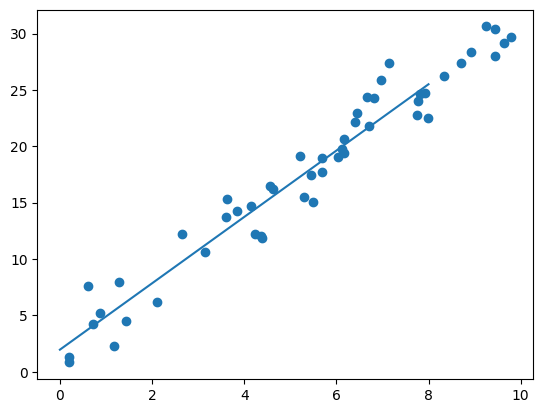

LinearRegression(slope=2.9385465894619043, intercept=1.9855798317394502)


In [117]:
import pandas as pd

def predict(x, m, c):
    return m * x + c

def loss(x_values, y_values, m, c):
    total_loss = 0
    for x, y in zip(x_values, y_values):
        total_loss += (predict(x, m, c) - y) ** 2
    return total_loss / float(len(x_values))

def gradient_descent(x_values, y_values, m, c, lr):
    m_gradient = 0
    c_gradient = 0
    n = len(x_values)
    for x, y in zip(x_values, y_values):
        m_gradient += x * (y - predict(x, m, c))
        c_gradient += y - predict(x, m, c)
    m += (2/n) * m_gradient * lr
    c += (2/n) * c_gradient * lr
    return m, c

def train(iterations, x_values, y_values, m, c, lr):
    for i in range(iterations):
        if i % 50 == 0:
            print("Loss:", loss(x_values, y_values, m, c), end="\r")
        m, c = gradient_descent(x_values, y_values, m, c, lr)
    return m, c

# test

df = pd.read_csv('data/housing_prices.csv')
x_values = df['square_feet'].to_numpy()
y_values = df['price_in_thousands'].to_numpy()

m, c = train(1000000, x_values, y_values, 0, 0, 0.00001)

print(m, c)

import matplotlib.pyplot as plt

plt.scatter(x_values, y_values)
sample_x_vals = [_ for _ in range(int(min(x_values)), int(max(x_values)))]
plt.plot(sample_x_vals, [m * x + c for x in sample_x_vals])
plt.show()

import statistics as stats

print(stats.linear_regression(x_values, y_values))
